## Data analyze and visualization of Stackoverflow surveys results to analyse develpoer job satisfaction
In this notebbook results from data preparation phase analyzed developers job satisfactions based on the Stackoverflow surveys.
Each year survey have different focus and questions

In [160]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

results_add = "./modified_results/modified_survey_results_public_"

In [161]:
# reading dataframe containing results from all the surveys 
df_all = pd.read_csv(results_add+"all_years.csv.gz",  compression='gzip')

In questionier there are questions which are appeared in almost all these consequent 6 years we looked for from 2015 to 2020. These questions are selected and their values checked against each other to eliminate dissimilarities in answers and definitions.

Except column for the **'Year'** representing results of the survey in that particular year, all other columns contain qualitative data.

In [3]:
df_all.head()

,Country,Age_Range,Gender,Salary_Range,Employment_Status,Job_Satisfaction,Formal_Education,UN_subregion,Continent,Year,Company_Size,CareerSatisfaction,Salary,Career_Satisfaction
0,Croatia,25-29,Male,"$20,000 - $40,000",Employed full-time,Moderately satisfied,"Master degree (MA, MS, M.Eng., MBA, etc.)",Southern Europe,Europe,2015,NaN,NaN,NaN,NaN
1,France,20-24,Male,"$20,000 - $40,000",Employed full-time,Neither satisfied nor dissatisfied,"Master degree (MA, MS, M.Eng., MBA, etc.)",Western Europe,Europe,2015,NaN,NaN,NaN,NaN
2,India,20-24,Male,"$80,000 - $100,000",Freelance / Contractor,Moderately satisfied,NaN,Southern Asia,Asia,2015,NaN,NaN,NaN,NaN
3,Latvia,25-29,Male,NaN,Employed full-time,Moderately satisfied,"Bachelor degree (BA, BS, B.Eng., etc.)",Northern Europe,Europe,2015,NaN,NaN,NaN,NaN
4,Norway,30-34,Male,"$60,000 - $80,000",Employed full-time,Extremely satisfied,"Bachelor degree (BA, BS, B.Eng., etc.)",Northern Europe,Europe,2015,NaN,NaN,NaN,NaN


#### Demographic of participant

In surveys gathered from 2015 to 2020 there are 333154 participants. We categorized them based on the answers they provided for their characteristic into three main categorize: 'Male', 'Female', 'genderqueer' and 'Other'. <br>
In below figure we can see share of each group in the answers. Majority of participants during all these years were 'Male' which certainly have influence of the analysis and resluts.

In [179]:
df_temp = df_all[['Gender']].copy()
df_temp = df_temp.dropna()
df_temp = df_temp.Gender.value_counts(normalize=True).mul(100).rename('Percent').reset_index()

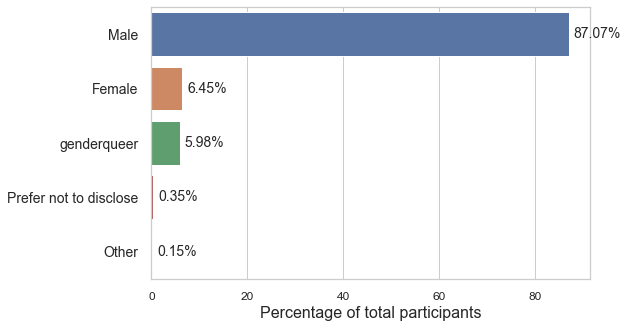

In [183]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))


sns.barplot(x="Percent", y="index", data=df_temp, label="Total", color="b",  palette="deep")

#ax.legend(title='Demographic', loc='upper right', bbox_to_anchor=(1.0, 1),fontsize=14)
#ax.set(ylabel="", xlabel="Percentage of total participants")
#sns.despine(left=True, bottom=True)
plt.rcParams['font.size'] = '14'

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Percentage of total participants", size=16)
plt.ylabel('') 

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}%'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
plt.savefig('./figures/genders_participation_percentage.png',bbox_inches = "tight")

### Part I: Job satisfaction for developers from 2015 to 2020
In this part our aim is to see job satisfaction in years 2015 to 2020

In [6]:
df_temp = df_all[['Year', 'Job_Satisfaction']].copy()
df_temp.Job_Satisfaction.unique()

array(['Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Extremely satisfied', 'Slightly dissatisfied',
       'Extremely dissatisfied', 'Other', nan, 'Moderately dissatisfied',
       'Slightly satisfied', 'Very satisfied', 'Very dissatisfied'],
      dtype=object)

The unique values in **'Job_Satisfaction'** are qualitative data. Droping NaN and 'Other' value from data frame.


In [7]:
# dropping 'nan' and 'Other' rows from df_temp
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['Job_Satisfaction'] != 'Other']


To check the satisfactin for each year and plot them later first lets change the order of the columns and appearance of satisfaction terms in each year.

In [8]:
df_temp = pd.crosstab(index=[df_temp['Year']], columns=df_temp['Job_Satisfaction'])

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

df_temp =df_temp[col_order]
#df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)
#pd.crosstab(index=[df['Name'],df['Date']],columns=df['Item'])
df_temp

Job_Satisfaction,Extremely dissatisfied,Very dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Very satisfied,Extremely satisfied
Year,,,,,,,,,
2015,305,0,0,1565,1775,0,6540,0,5819
2016,14084,0,0,4512,4416,0,16413,0,0
2017,840,0,2523,0,5614,4726,16952,0,9721
2018,2482,0,6318,7057,4966,10012,26005,0,12436
2019,0,4857,0,10752,8720,24207,0,22452,0
2020,0,3746,0,7124,5783,13930,0,14611,0


In [9]:
# Making above counts in satisfactions columns into percentage
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

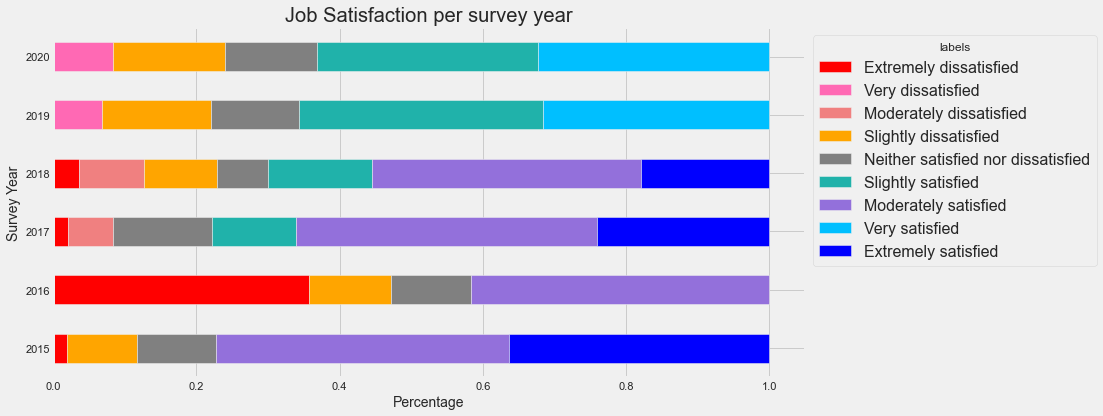

In [10]:
# plt.style.use('Solarize_Light2')
plt.style.use('fivethirtyeight')

colors=['red','hotpink', 'lightcoral','orange', 'gray', 'lightseagreen', 'mediumpurple', 'deepskyblue','blue']

#plt.tight_layout()
ax = df_temp.plot(kind='barh', stacked=True, figsize=(12, 6), color=colors)
ax.set_ylabel('Survey Year',fontsize=14)
ax.set_xlabel('Percentage',fontsize=14)
plt.title('Job Satisfaction per survey year')
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left',fontsize=16)
plt.show()
ax.figure.savefig('./figures/survey_all_years.png', bbox_inches = "tight")
#fig = ax.get_figure()
#fig.savefig('./figures/survey_all_years2.png')

In general most of the participant in this inquery were satisfied from their current job except the year of 2016. The high satisfaction in 2015 declined during next 5 years. In years 2019 and 2020 the participant who were 'Slightly satisfied' from their current job shows big growth comparing to other years. From year 2018 onward developers lost their 'Extreme' satisfaction and there is shift in 2019 and 2020 from 'Extreme' to 'Very' satisfied also from 'Moderate' to 'Slightly' job satisfaction. 
As we can see having this amount of categories for satisfaction does not help very much to get insight from data. Maybe changing such categories into less number of classes could help more. For making interpretation easier maybe decreasing them into 3 or 4 classed instead of 8 makes the work easier. Lets change them as below:

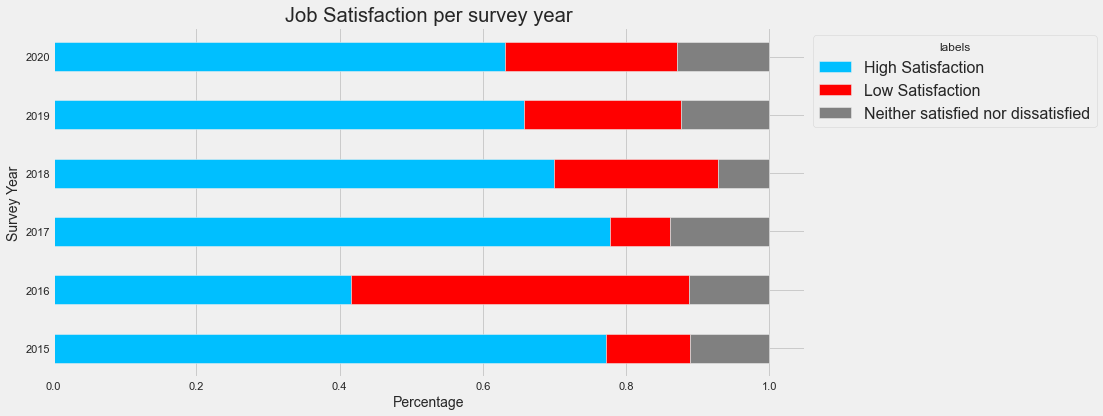

In [11]:
#font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size'   : 22}

#plt.rc('font', **font)
#plt.style.use('default')

plt.style.use('fivethirtyeight')
colors= ['deepskyblue','red','gray']

dic_sat ={'Extremely dissatisfied':'Low Satisfaction','Very dissatisfied':'Low Satisfaction',
          'Moderately dissatisfied':'Low Satisfaction','Slightly dissatisfied':'Low Satisfaction',
          'Slightly satisfied':'High Satisfaction' ,'Moderately satisfied':'High Satisfaction' ,
          'Very satisfied':'High Satisfaction' ,'Extremely satisfied':'High Satisfaction' }

df_temp = df_all[['Year', 'Job_Satisfaction']].copy()

for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)

    
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['Job_Satisfaction'] != 'Other']

df_temp = pd.crosstab(index=[df_temp['Year']], columns=df_temp['Job_Satisfaction'])

df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

ax = df_temp.plot(kind='barh', stacked=True, figsize=(12, 6), color=colors)
ax.set_ylabel('Survey Year',fontsize=14)
ax.set_xlabel('Percentage',fontsize=14)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left',fontsize=16)
plt.title('Job Satisfaction per survey year')
plt.show()
ax.figure.savefig('./figures/survey_all_years2.png', bbox_inches = "tight")

This figure shows that satisfaction in general is decreasing from 2015 onward with sharp drop in 2016. It seems 2016 job satisfaction hit the lowest record in IT industry for developers but happily went backed to year 2015 estimation in 2017 altought it declined in next 3 years but still in 2020 it is much better than 2016.

### part  II: Job satisfaction by country and continent
Here we want to analyse developers job satisfaction based on country, continent and UN subregion. Developers that filled in the inqueries during these years are from 226 countries around the glob.Lets first look to the continent and subregion data and see where are the more satisfied developers in the glob.

In [12]:
df_temp = df_all[['Continent', 'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()
df_temp.Continent.unique()

array(['Europe', 'Asia', 'Americas', 'Oceania', 'Africa'], dtype=object)

In [13]:
df_temp

,Continent,Job_Satisfaction
0,Europe,Moderately satisfied
1,Europe,Neither satisfied nor dissatisfied
2,Asia,Moderately satisfied
3,Europe,Moderately satisfied
4,Europe,Extremely satisfied
...,...,...
385393,Americas,Slightly satisfied
385394,Americas,Slightly satisfied
385398,Americas,Very satisfied
385399,Americas,Neither satisfied nor dissatisfied


In [14]:
df_temp = pd.crosstab(index=[df_temp['Continent']], columns=df_temp['Job_Satisfaction'])

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

df_temp =df_temp[col_order]

# Making these satisfactions as percentage
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

df_temp

Job_Satisfaction,Extremely dissatisfied,Very dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Very satisfied,Extremely satisfied
Continent,,,,,,,,,
Africa,0.059185,0.049111,0.039037,0.127341,0.141665,0.211239,0.178341,0.111286,0.082796
Americas,0.069218,0.028609,0.030334,0.102806,0.091232,0.176250,0.231011,0.158812,0.111727
Asia,0.056400,0.037894,0.037343,0.124954,0.163876,0.211170,0.194096,0.095451,0.078817
Europe,0.061059,0.028084,0.029363,0.108635,0.102193,0.186123,0.256861,0.127962,0.099719
Oceania,0.063052,0.027113,0.030055,0.106280,0.092339,0.180458,0.248497,0.148612,0.103594


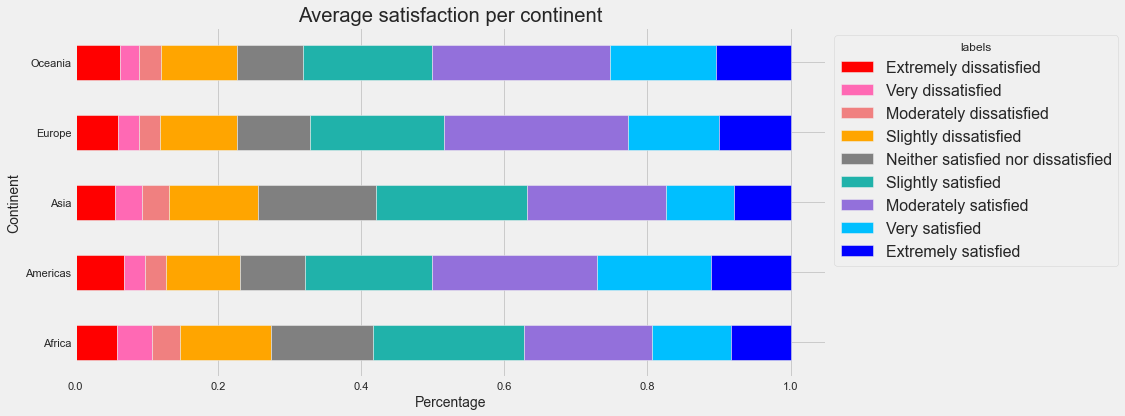

In [15]:
# Plot of above table
colors=['red','hotpink', 'lightcoral','orange', 'gray', 'lightseagreen', 'mediumpurple', 'deepskyblue','blue']
ax = df_temp.plot(kind='barh', stacked=True, figsize=(12, 6), color=colors)
ax.set_ylabel('Continent',fontsize=14)
ax.set_xlabel('Percentage',fontsize=14)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left',fontsize=16)
plt.title('Average satisfaction per continent')
plt.show()
ax.figure.savefig('./figures/continent_vs_satisfaction.png', bbox_inches = "tight")

The look is interesting, some how exiting. <br> 
The reason is when looking at the figure  we can see the same trend as in Part I happens here again. Amount of satisfaction in each category is very close to each other specially for who are 'Extremly dissatisfied' from their job all around the globe. Lets decrease the number of categories and look to the plot again.

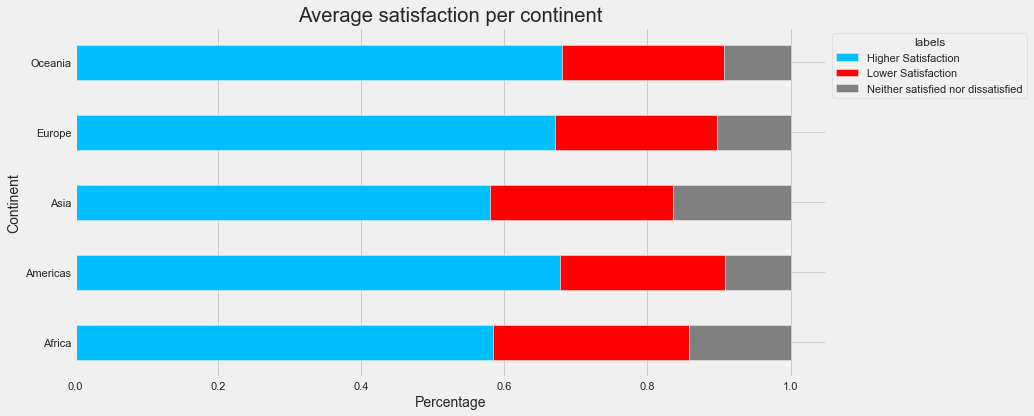

In [16]:
dic_sat ={'Extremely dissatisfied':'Lower Satisfaction','Very dissatisfied':'Lower Satisfaction',
          'Moderately dissatisfied':'Lower Satisfaction','Slightly dissatisfied':'Lower Satisfaction',
          'Slightly satisfied':'Higher Satisfaction' ,'Moderately satisfied':'Higher Satisfaction' ,
          'Very satisfied':'Higher Satisfaction' ,'Extremely satisfied':'Higher Satisfaction' }

df_temp = df_all[['Continent', 'Job_Satisfaction']].copy()

for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)

    
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['Job_Satisfaction'] != 'Other']

df_temp = pd.crosstab(index=[df_temp['Continent']], columns=df_temp['Job_Satisfaction'])

df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

colors= ['deepskyblue','red','gray']
ax = df_temp.plot(kind='barh', stacked=True, figsize=(12, 6), color=colors)
ax.set_ylabel('Continent',fontsize=14)
ax.set_xlabel('Percentage',fontsize=14)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.title('Average satisfaction per continent')
plt.show()
ax.figure.savefig('./figures/continent_vs_satisfaction2.png', bbox_inches = "tight")

Percentage of developers have job satisfaction in Asia and Africa is lower but the reason is not they are dissatisfied as we can see in the figure. Job dissatisfaction is close to what we have in other continets. But the amount of IT people which are in between of these two is higher as we can see from below table.

In [17]:
df_temp

Job_Satisfaction,Higher Satisfaction,Lower Satisfaction,Neither satisfied nor dissatisfied
Continent,,,
Africa,0.583661,0.274673,0.141665
Americas,0.677801,0.230967,0.091232
Asia,0.579533,0.256591,0.163876
Europe,0.670665,0.227141,0.102193
Oceania,0.681161,0.226500,0.092339


### Country and subregion

In [18]:
df_temp = df_all[['UN_subregion', 'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()

df_temp = pd.crosstab(index=[df_temp['UN_subregion']], columns=df_temp['Job_Satisfaction'])

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

df_temp =df_temp[col_order]

# Making these satisfactions as percentage
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

df_temp.sort_values(by=['Extremely satisfied', 'Very satisfied'], inplace=True)
df_temp.shape

(24, 9)

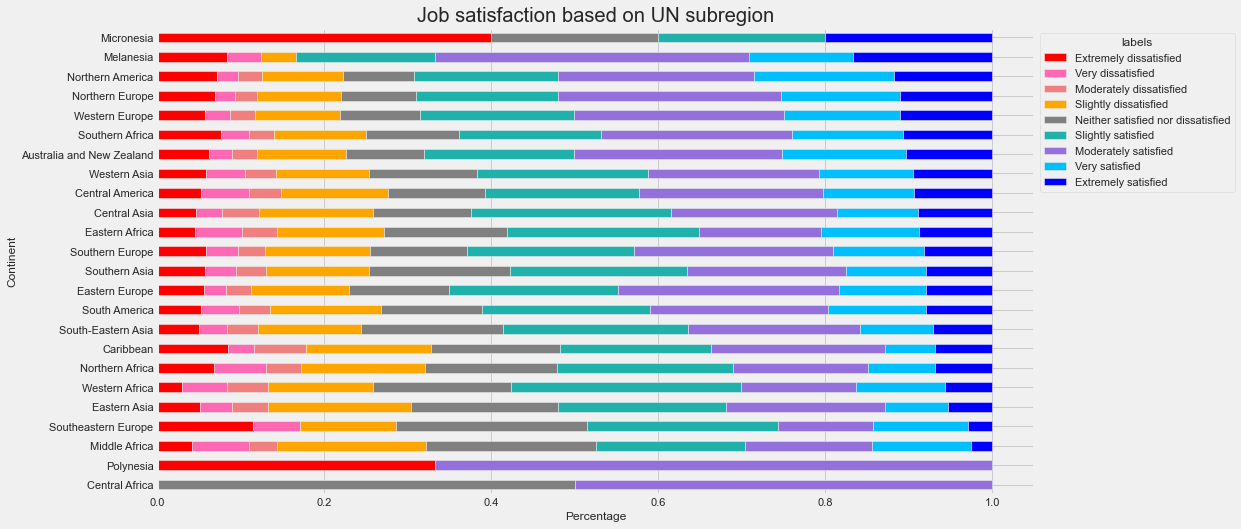

In [19]:
# Plot of above table
colors=['red','hotpink', 'lightcoral','orange', 'gray', 'lightseagreen', 'mediumpurple', 'deepskyblue','blue']

ax = df_temp.plot(kind='barh', stacked=True, figsize=(14, 8), color=colors)
ax.set_ylabel('Continent',fontsize=12)
ax.set_xlabel('Percentage',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.title('Job satisfaction based on UN subregion')
plt.show()
ax.figure.savefig('./figures/country_vs_satisfaction.png', bbox_inches = "tight")

Developers in Ocenia, Northern America and Northern Europe have the most exterme opinions and feeling about their job. They are Extremely satisfied and dissatisfied among developers participated in inqueries.

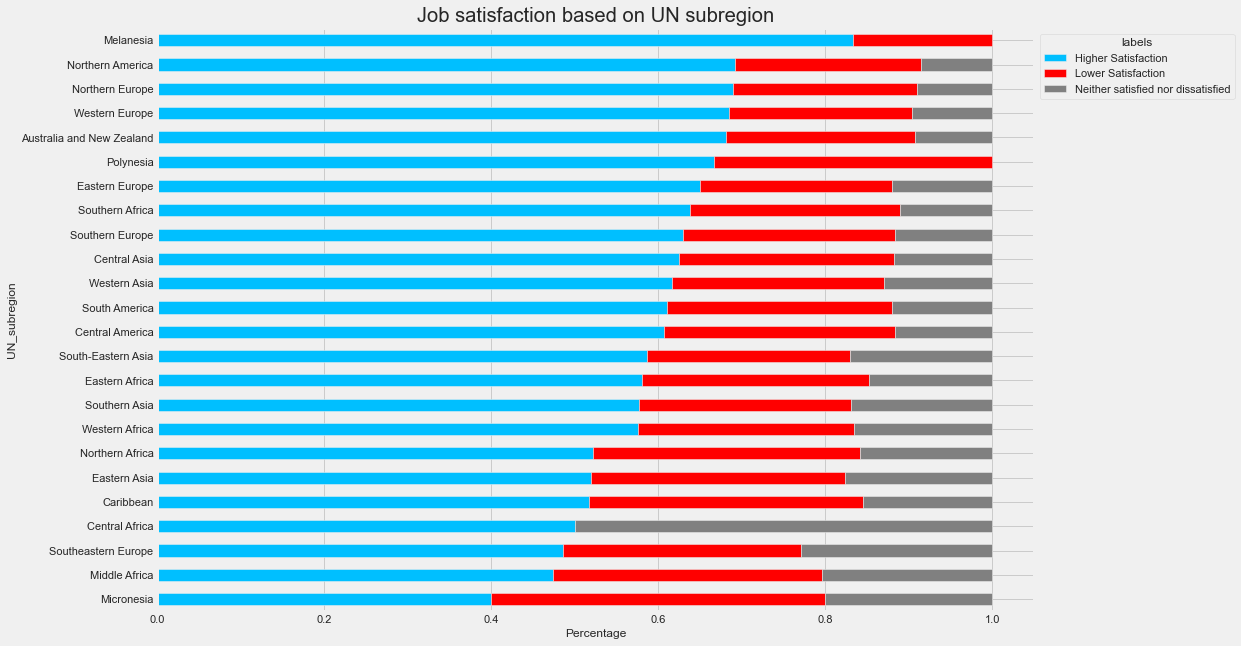

In [20]:
dic_sat ={'Extremely dissatisfied':'Lower Satisfaction','Very dissatisfied':'Lower Satisfaction',
          'Moderately dissatisfied':'Lower Satisfaction','Slightly dissatisfied':'Lower Satisfaction',
          'Slightly satisfied':'Higher Satisfaction' ,'Moderately satisfied':'Higher Satisfaction' ,
          'Very satisfied':'Higher Satisfaction' ,'Extremely satisfied':'Higher Satisfaction' }

df_temp = df_all[['UN_subregion', 'Job_Satisfaction']].copy()

for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)

    
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['Job_Satisfaction'] != 'Other']

df_temp = pd.crosstab(index=[df_temp['UN_subregion']], columns=df_temp['Job_Satisfaction'])

df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

df_temp.sort_values(by=['Higher Satisfaction'], inplace=True)

colors= ['deepskyblue','red','gray']
ax = df_temp.plot(kind='barh', stacked=True, figsize=(14, 10), color=colors)
ax.set_ylabel('UN_subregion',fontsize=12)
ax.set_xlabel('Percentage',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.title('Job satisfaction based on UN subregion')
plt.show()
ax.figure.savefig('./figures/country_vs_satisfaction2.png', bbox_inches = "tight")

Increasing number of cetagories for job satisfaction, we can observe that above trend appears here. In general Oceinia and Northern Europe developers are more satisfied from their job. lets look to the countries and see what are the top countries with satisfaction.

In [21]:
df_temp = df_all[['Country', 'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()

df_temp = pd.crosstab(index=[df_temp['Country']], columns=df_temp['Job_Satisfaction'])

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

df_temp =df_temp[col_order]

# Making these satisfactions as percentage
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)


df_temp.sort_values(by=['Extremely satisfied'], inplace=True, ascending=False)

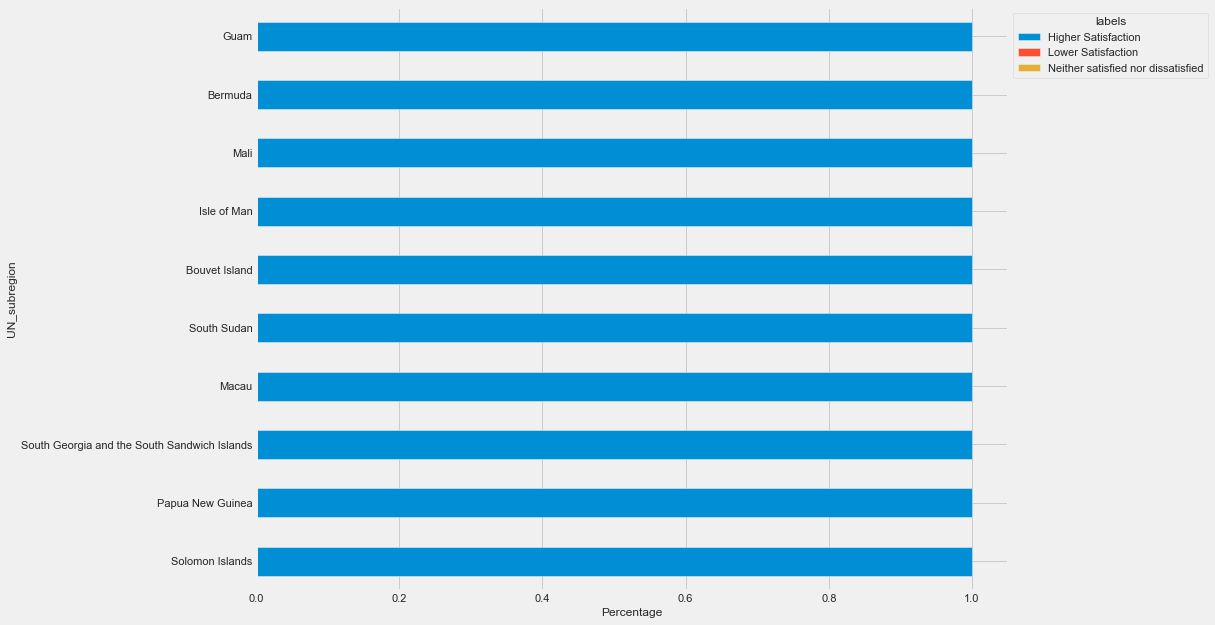

In [22]:
dic_sat ={'Extremely dissatisfied':'Lower Satisfaction','Very dissatisfied':'Lower Satisfaction',
          'Moderately dissatisfied':'Lower Satisfaction','Slightly dissatisfied':'Lower Satisfaction',
          'Slightly satisfied':'Higher Satisfaction' ,'Moderately satisfied':'Higher Satisfaction' ,
          'Very satisfied':'Higher Satisfaction' ,'Extremely satisfied':'Higher Satisfaction' }

df_temp = df_all[['Country', 'Job_Satisfaction']].copy()

for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)

    
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['Job_Satisfaction'] != 'Other']

df_temp = pd.crosstab(index=[df_temp['Country']], columns=df_temp['Job_Satisfaction'])

df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

df_temp.sort_values(by=['Higher Satisfaction'], inplace=True, ascending=False)


ax = df_temp[:10].plot(kind='barh', stacked=True, figsize=(12, 10))
ax.set_ylabel('UN_subregion',fontsize=12)
ax.set_xlabel('Percentage',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()
#ax.figure.savefig('./figures/country_vs_satisfaction2.png', bbox_inches = "tight")

And obvoiusly developers in islands are the satisfied developers among all the other ones except **'South Sudan'**. One impossibility could be they live and work in calm places which influence their objection on this matter.

### Part III: Gender and Salary influence on job satisfaction.
In data pereparation we assigned the persons participated in surveys into 3 categories: 'Female', 'Male' and 'genderqueer'. In this part we check Gender and Salary influence on the satisfaction.<br> 
In all the survey results during these 6 years just in years of 2016, 2018 and 2020 there is fields of salary or salary range exist. On the other hand the range used in 2016 and 2018 are different and have overlaps, in 2020 they expressed their salary value which could be used to create **'Salary_Range'** column which 2018 format used to do so. 

Lets for begining look to genders job satisfaction in general without considering other values like salary or continent or company size.

In [23]:
df_temp = df_all[['Gender', 'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()


df_temp = pd.crosstab(index=[df_temp['Gender']], columns=df_temp['Job_Satisfaction'])

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

df_temp =df_temp[col_order]



# Making these satisfactions as percentage
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)


df_temp.sort_values(by=['Extremely satisfied'], inplace=True, ascending=False)

df_temp

Job_Satisfaction,Extremely dissatisfied,Very dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Very satisfied,Extremely satisfied
Gender,,,,,,,,,
genderqueer,0.024817,0.009279,0.062221,0.021652,0.148396,0.135520,0.357718,0.030140,0.210258
Other,0.229091,0.000000,0.032727,0.061818,0.072727,0.058182,0.432727,0.000000,0.112727
Prefer not to disclose,0.278182,0.000000,0.000000,0.123636,0.112727,0.000000,0.372727,0.000000,0.112727
Male,0.067612,0.031541,0.027576,0.114697,0.109197,0.190052,0.228856,0.137690,0.092779
Female,0.064536,0.033628,0.027014,0.116462,0.102677,0.192928,0.197935,0.173209,0.091612


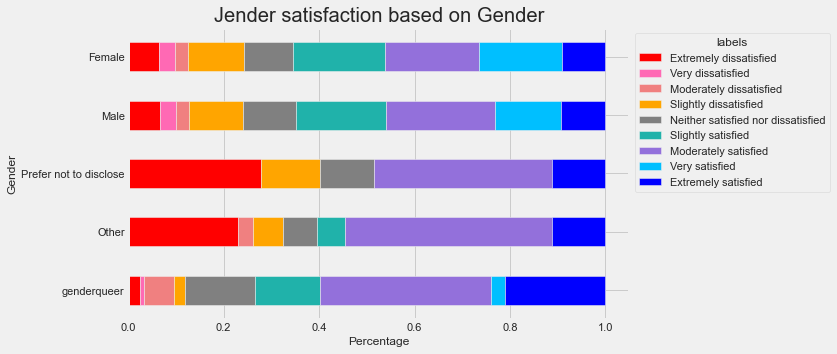

In [24]:
colors=['red','hotpink', 'lightcoral','orange', 'gray', 'lightseagreen', 'mediumpurple', 'deepskyblue','blue']

ax = df_temp.plot(kind='barh', stacked=True, figsize=(8, 5), color=colors)
ax.set_ylabel('Gender',fontsize=12)
ax.set_xlabel('Percentage',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.title('Jender satisfaction based on Gender')
plt.show()
ax.figure.savefig('./figures/Gender_vs_satisfaction.png', bbox_inches = "tight")

By looking into this figure we can see that **'genderqueer'** category have the highest satisfaction and are less dissatisfied from their job as developers or IT person. For 'Male' and 'Female' category the amounts are pretty close to each other in all the levels of satisfaction just 'Female' gropus memebr have more  satisfaction feeling for their job than 'Male' group.<br>
Lets see the influence of salary in these feelings in general then for gender.

In [25]:
df_temp = df_all[['Salary_Range', 'Gender' ,'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()
df_temp.shape

(183654, 3)

In [26]:
def divide_two_cols(df_sub):
    return 100*df_sub['Percentage'] / float(df_sub['Percentage'].sum())


df_temp['Percentage'] = 0

df_temp = df_temp.groupby(['Gender' ,'Salary_Range','Job_Satisfaction']).count().reset_index()


df_new = df_temp.groupby(['Gender', 'Salary_Range']).apply(divide_two_cols).reset_index()
# for x in total_sum.index:
#     index = df_temp[df_temp['Gender']==x].index
#     df_temp.loc[index,'Percentage'] =df_temp.Percentage[index]/total_sum[x]

df_temp['Percentage'] = df_new['Percentage']

del df_new

df_temp

,Gender,Salary_Range,Job_Satisfaction,Percentage
0,Female,"$10,000 - $20,000",Extremely dissatisfied,7.794677
1,Female,"$10,000 - $20,000",Extremely satisfied,3.422053
2,Female,"$10,000 - $20,000",Moderately dissatisfied,1.996198
3,Female,"$10,000 - $20,000",Moderately satisfied,20.247148
4,Female,"$10,000 - $20,000",Neither satisfied nor dissatisfied,12.357414
...,...,...,...,...
912,genderqueer,Rather not say,Extremely satisfied,14.285714
913,genderqueer,Rather not say,Moderately satisfied,57.142857
914,genderqueer,Rather not say,Neither satisfied nor dissatisfied,14.285714
915,genderqueer,Rather not say,Other,14.285714


To make it easier to plot we add Mid column and take the min between each range. 

In [27]:
unique = df_temp.Salary_Range.unique()

dic = dict()
for u in df_temp.Salary_Range.unique():
    if u not in dic.keys():
        if u == 'More than $200,000':
            dic[u]=200000
        elif u == 'Less than $10,000':
            dic[u] = 5000
        elif u == 'More than $160,000':
            dic[u] = 160000
        elif u =='Less than $20,000':
            dic[u] = 15000
        elif u =='Unemployed':
            continue
        elif u =='Rather not say':
            continue
        elif u =='Other':
            continue
        else:
            text = u.replace('$',"")
            text = text.replace(',' , '')
            split = text.split('-')
            dic[u]=(int(split[0])+int(split[1]))/2

index = df_temp[df_temp['Salary_Range'].isin(['Other','Rather not say','Unemployed'])].index
df_temp.drop(index, inplace=True)

index = df_temp[df_temp['Gender'].isin(['Other','Prefer not to disclose'])].index
df_temp.drop(index, inplace=True)

for key in dic.keys():
    df_temp.loc[df_temp.Salary_Range==key,'Salary_Range']=dic[key]

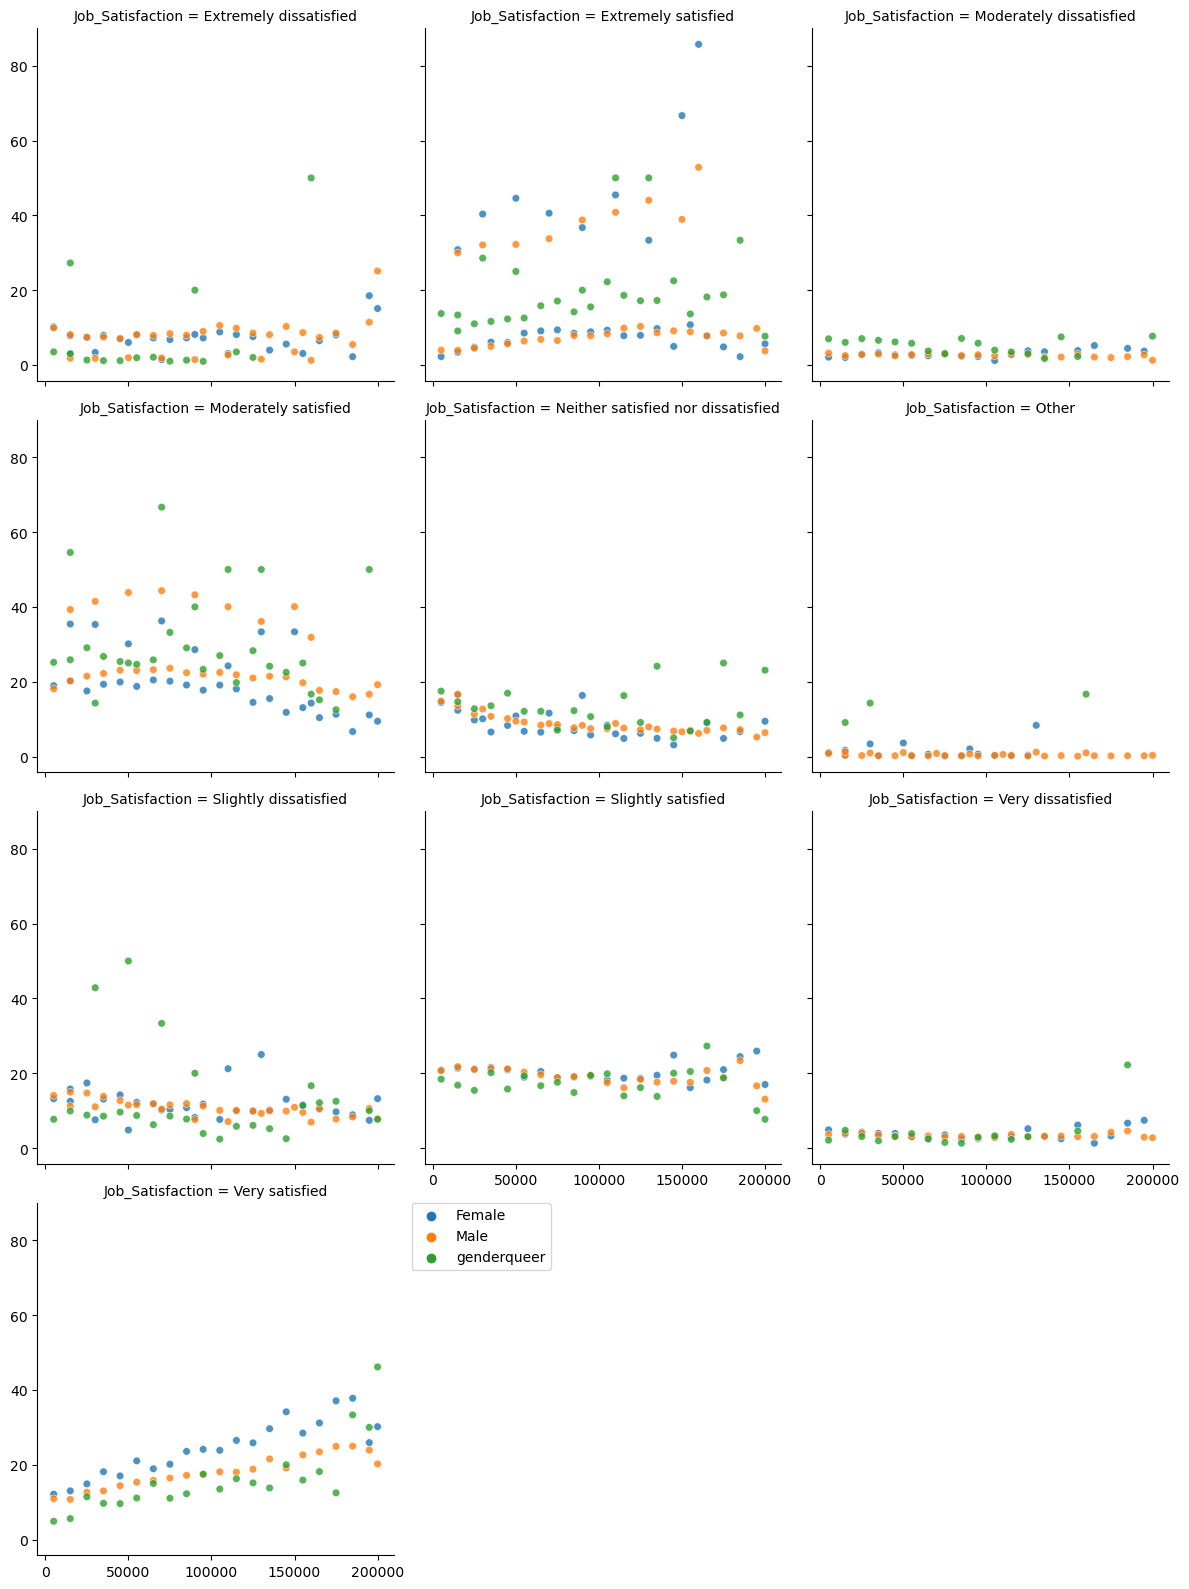

In [28]:
#fig, ax = pyplot.subplots(figsize=a4_dims)
#rows = len(df_temp.Job_Satisfaction.unique())
#fig, axes = plt.subplots(nrows=rows, figsize=(12,5))
plt.style.use('default')

graph = sns.FacetGrid(df_temp, col="Job_Satisfaction", col_wrap=3, height=4)
graph.map_dataframe(sns.scatterplot, x="Salary_Range", y="Percentage", hue="Gender", s=30, alpha=.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Interestingly job satisfaction for Male and Female follow same trend. 
The above figure shows that all the **'Gender'** class are follow same trend. By increasing compensation job satisfaction will increase and dissatisfaction decrease. <br>
In below lines we decrease number of **'Job_Satisfaction'** groups by merging into 3 major groups: higer, lower and neither of both.<br>
Results show that by increasing salary and income satisfaction change to more positive feelings. When salary grown more than 160,000 again it change to negative feelings. Higher satisfaction start to decrease and dissatisfaction increases. 

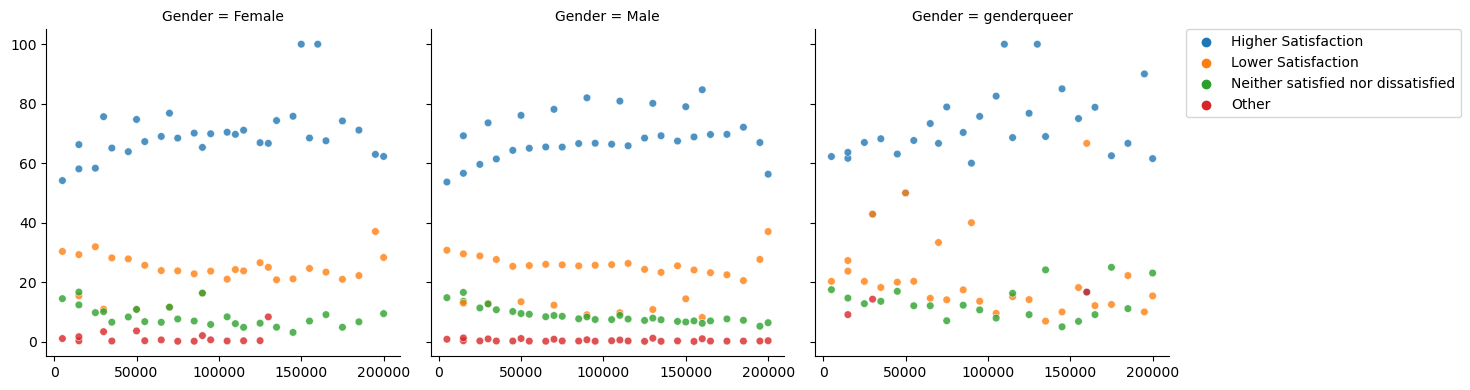

In [29]:
df_temp = df_all[['Salary_Range', 'Gender' ,'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()
df_temp.shape

dic_sat ={'Extremely dissatisfied':'Lower Satisfaction','Very dissatisfied':'Lower Satisfaction',
          'Moderately dissatisfied':'Lower Satisfaction','Slightly dissatisfied':'Lower Satisfaction',
          'Slightly satisfied':'Higher Satisfaction' ,'Moderately satisfied':'Higher Satisfaction' ,
          'Very satisfied':'Higher Satisfaction' ,'Extremely satisfied':'Higher Satisfaction' }

for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)

df_temp['Percentage'] = 0

df_temp = df_temp.groupby(['Gender' ,'Salary_Range','Job_Satisfaction']).count().reset_index()

df_new = df_temp.groupby(['Gender', 'Salary_Range']).apply(divide_two_cols).reset_index()
df_temp['Percentage'] = df_new['Percentage']
del df_new


dic = dict()
for u in df_temp.Salary_Range.unique():
    if u not in dic.keys():
        if u == 'More than $200,000':
            dic[u]=200000
        elif u == 'Less than $10,000':
            dic[u] = 5000
        elif u == 'More than $160,000':
            dic[u] = 160000
        elif u =='Less than $20,000':
            dic[u] = 15000
        elif u =='Unemployed':
            continue
        elif u =='Rather not say':
            continue
        elif u =='Other':
            continue
        else:
            text = u.replace('$',"")
            text = text.replace(',' , '')
            split = text.split('-')
            dic[u]=(int(split[0])+int(split[1]))/2

index = df_temp[df_temp['Salary_Range'].isin(['Other','Rather not say','Unemployed'])].index
df_temp.drop(index, inplace=True)

index = df_temp[df_temp['Gender'].isin(['Other','Prefer not to disclose'])].index
df_temp.drop(index, inplace=True)

for key in dic.keys():
    df_temp.loc[df_temp.Salary_Range==key,'Salary_Range']=dic[key]
    
    

graph = sns.FacetGrid(df_temp, col="Gender", col_wrap=3, height=4)
graph.map_dataframe(sns.scatterplot, x="Salary_Range", y="Percentage", hue="Job_Satisfaction", s=30, alpha=.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## SALARY and job satisfaction

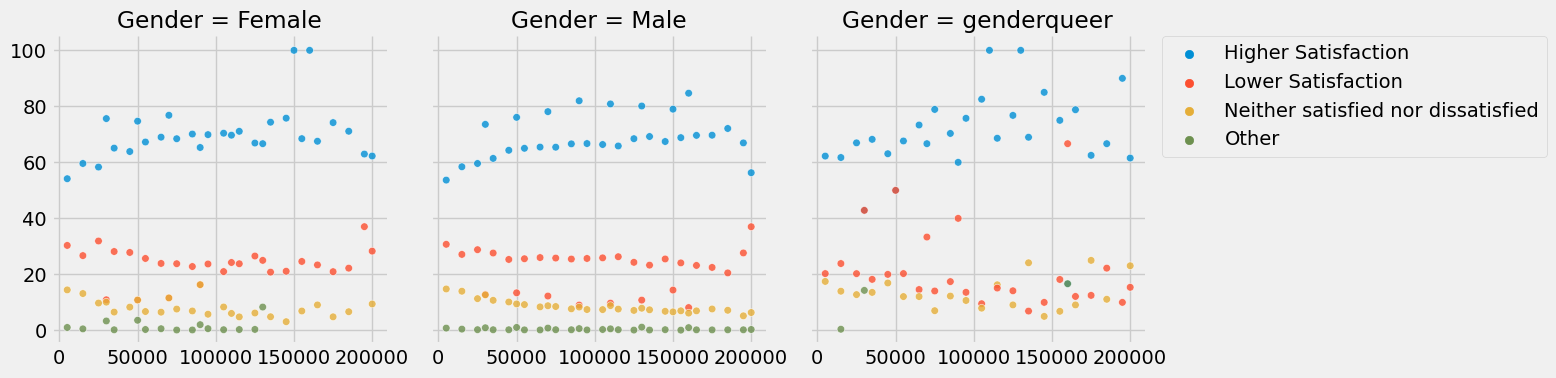

In [30]:
plt.style.use('fivethirtyeight')

df_temp = df_all[['Salary_Range', 'Gender' ,'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()


index = df_temp[df_temp['Gender'].isin(['Other','Prefer not to disclose'])].index
df_temp.drop(index, inplace=True)


dic = dict()
for u in df_temp.Salary_Range.unique():
    if u not in dic.keys():
        if u == 'More than $200,000':
            dic[u]=200000
        elif u == 'Less than $10,000':
            dic[u] = 5000
        elif u == 'More than $160,000':
            dic[u] = 160000
        elif u =='Less than $20,000':
            dic[u] = 15000
        elif u =='Unemployed':
            continue
        elif u =='Rather not say':
            continue
        elif u =='Other':
            continue
        else:
            text = u.replace('$',"")
            text = text.replace(',' , '')
            split = text.split('-')
            dic[u]=(int(split[0])+int(split[1]))/2
index = df_temp[df_temp['Salary_Range'].isin(['Other','Rather not say','Unemployed'])].index

df_temp.drop(index, inplace=True)

for key in dic.keys():
    df_temp.loc[df_temp.Salary_Range==key,'Salary_Range']=dic[key]


dic_sat ={'Extremely dissatisfied':'Lower Satisfaction','Very dissatisfied':'Lower Satisfaction',
          'Moderately dissatisfied':'Lower Satisfaction','Slightly dissatisfied':'Lower Satisfaction',
          'Slightly satisfied':'Higher Satisfaction' ,'Moderately satisfied':'Higher Satisfaction' ,
          'Very satisfied':'Higher Satisfaction' ,'Extremely satisfied':'Higher Satisfaction' }

for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)
    
    
#df_temp['Percentage'] = 0
df_temp = df_temp.groupby(['Salary_Range', 'Gender']).Job_Satisfaction.value_counts(normalize=True).mul(100).rename('row_percent').reset_index()
# df_temp = df_temp.groupby(['Salary_Range', 'Gender']).Job_Satisfaction.value_counts().rename('row_percent').reset_index()


#df_temp = pd.crosstab(index=df_temp['Salary_Range'], columns=df_temp[['Job_Satisfaction','Gender']])

#col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
#            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
#            'Slightly satisfied' ,'Moderately satisfied' ,
#            'Very satisfied' ,'Extremely satisfied']

#df_temp =df_temp[col_order]

# #df_temp = df_temp.groupby(['Salary_Range','Gender']).sum().reset_index()


# df_temp = df_temp.groupby(['Gender','Salary_Range','Job_Satisfaction']).sum().reset_index()
df_temp

graph = sns.FacetGrid(df_temp, col="Gender", col_wrap=3, height=4)
graph.map_dataframe(sns.scatterplot, x="Salary_Range", y="row_percent", hue="Job_Satisfaction", s=30, alpha=.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('./figures/Gender_vs_JobSatisfaction.png', bbox_inches = "tight")
#ax.figure.savefig('./figures/Gender_vs_JobSatisfaction.png', bbox_inches = "tight")

## Changing satisfaction from qualitative to quantitative

In [31]:
df_temp = df_all[['Salary_Range', 'Gender' ,'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()


dic_sat ={'Extremely dissatisfied':0, 'Very dissatisfied':1,'Neither satisfied nor dissatisfied':4,
          'Moderately dissatisfied':3,'Slightly dissatisfied':2,
          'Slightly satisfied':5 ,'Moderately satisfied':6 ,
          'Very satisfied':7 ,'Extremely satisfied':8 }
for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)


index = df_temp[df_temp['Gender'].isin(['Other','Prefer not to disclose'])].index
df_temp.drop(index, inplace=True)

df_temp.drop(df_temp[df_temp['Job_Satisfaction'] == 'Other'].index,inplace=True)


In [32]:
df_temp = df_temp.groupby(['Salary_Range', 'Gender']).Job_Satisfaction.value_counts().rename('row_count').reset_index()


In [33]:
df_temp['Score'] = df_temp['Job_Satisfaction']*df_temp['row_count']
df_temp = df_temp.drop(columns=['Job_Satisfaction'])



In [34]:
df_temp = df_temp.groupby(['Salary_Range','Gender']).sum().reset_index()


In [35]:
df_temp['Score'] = df_temp['Score']/df_temp['row_count']


In [36]:
# dict_sum = df_temp.groupby('Salary_Range').Score.sum().to_dict()

# for key in dict_sum.keys():
#     index = df_temp[df_temp['Salary_Range']== key].index
#     df_temp.loc[index, 'Score'] = df_temp.loc[index, 'Score']/dict_sum[key]

# df_temp

In [37]:
unique = df_temp.Salary_Range.unique()

dic = dict()
for u in df_temp.Salary_Range.unique():
    if u not in dic.keys():
        if u == 'More than $200,000':
            dic[u]=200000
        elif u == 'Less than $10,000':
            dic[u] = 5000
        elif u == 'More than $160,000':
            dic[u] = 160000
        elif u =='Less than $20,000':
            dic[u] = 15000
        elif u =='Unemployed':
            continue
        elif u =='Rather not say':
            continue
        elif u =='Other':
            continue
        else:
            text = u.replace('$',"")
            text = text.replace(',' , '')
            split = text.split('-')
            dic[u]=(int(split[0])+int(split[1]))/2
index = df_temp[df_temp['Salary_Range'].isin(['Other','Rather not say','Unemployed'])].index

df_temp.drop(index, inplace=True)

for key in dic.keys():
    df_temp.loc[df_temp.Salary_Range==key,'Salary_Range']=dic[key]


In [38]:
# plt.style.use('fivethirtyeight')
# graph = sns.FacetGrid(df_temp,height=4)
# graph.map_dataframe(sns.scatterplot, x="Salary_Range", y="Score", hue="Gender", s=30, alpha=.8)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# graph.fig.subplots_adjust(top=0.9)
# graph.fig.suptitle('Salary VS Satisfaction', fontsize=8)
# graph.axes[0,0].set_xlabel('Salary',fontsize=8);
# graph.axes[0,0].set_ylabel('Average Satisfaction',fontsize=8);

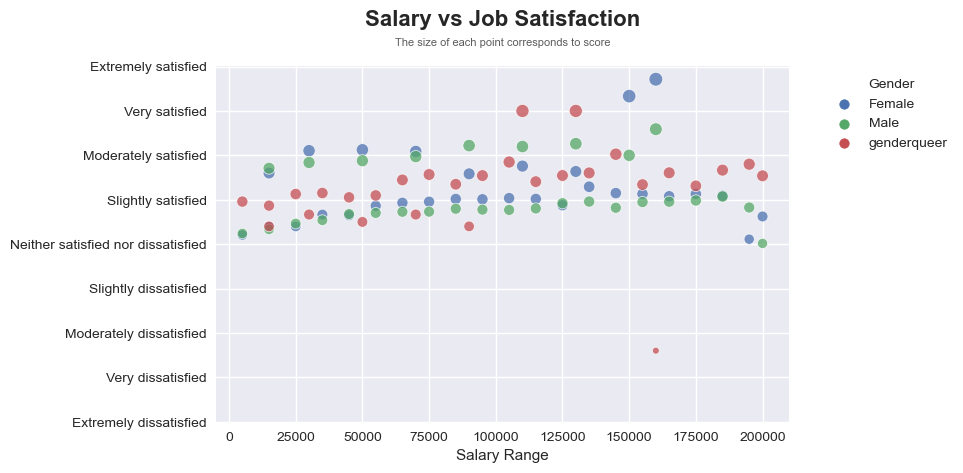

In [39]:
#plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
plt.style.use('seaborn')
# plt.style.use('bmh')

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']


# plot
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(
    x='Salary_Range',
    y='Score',
    hue='Gender',
    size='Score',
    alpha=0.75,
    legend='brief',
    data=df_temp,
    ax=ax
)

# make adjustments
ax.set_xlabel('Salary Range')
ax.set_ylabel('')

ax.text(x=0.5, y=1.1, s='Salary vs Job Satisfaction', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to score', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

tickvalues = range(0,len(col_order))
plt.yticks(ticks = tickvalues ,labels = col_order)
#ax.set_yticks(ticks = tickvalues)

fig.tight_layout()
plt.show()
ax.figure.savefig('./figures/Salary_vs_JobSatisfaction.png', bbox_inches = "tight")

### Part V: Age and job satisfaction
Because of different age range in year 2016 with years 2018 and 2020 for this comparison we just use data from the years 2018 and 2020. Other years except these three years don't have any data about participants age.


In [60]:
index = df_all[df_all.Year.isin([2018,2020])].index

df_temp = df_all.loc[index, ['Age_Range', 'Gender' ,'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()
# unique = df_temp.Age_Range.unique()

dic = dict()
for u in df_temp.Age_Range.unique():
    if u == 'Under 18 years old':
        dic[u] = 18
    elif u == '65 years or older':
        dic[u]= 65
    else:
        text = u.replace(' years old',"")
        split = text.split(' - ')
        dic[u]=(int(split[0])+int(split[1]))/2

for key in dic.keys():
    df_temp.loc[df_temp.Age_Range==key,'Age_Range']=dic[key]     

In [61]:
dic_sat ={'Extremely dissatisfied':0, 'Very dissatisfied':1,'Neither satisfied nor dissatisfied':4,
          'Moderately dissatisfied':3,'Slightly dissatisfied':2,
          'Slightly satisfied':5 ,'Moderately satisfied':6 ,
          'Very satisfied':7 ,'Extremely satisfied':8 }
for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)


index = df_temp[df_temp['Gender'].isin(['Other','Prefer not to disclose'])].index
df_temp.drop(index, inplace=True)

df_temp.drop(df_temp[df_temp['Job_Satisfaction'] == 'Other'].index,inplace=True)

df_temp = df_temp.groupby(['Age_Range', 'Gender']).Job_Satisfaction.value_counts().rename('row_count').reset_index()

df_temp['Score'] = df_temp['Job_Satisfaction']*df_temp['row_count']
df_temp = df_temp.drop(columns=['Job_Satisfaction'])

df_temp = df_temp.groupby(['Age_Range','Gender']).sum().reset_index()

df_temp['Score'] = df_temp['Score']/df_temp['row_count']



In [62]:
# plt.style.use('ggplot')


# graph = sns.FacetGrid(df_temp,height=6)
# graph.map_dataframe(sns.scatterplot, x="Age_Range", y="Score", hue="Gender",s=50,  alpha=.8)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# graph.axes[0,0].set_xlabel('Age Range');
# graph.axes[0,0].set_ylabel('Average Satisfaction');

# graph.savefig("./figures/Age_vs_Satisfaction.png")

Plotting the results

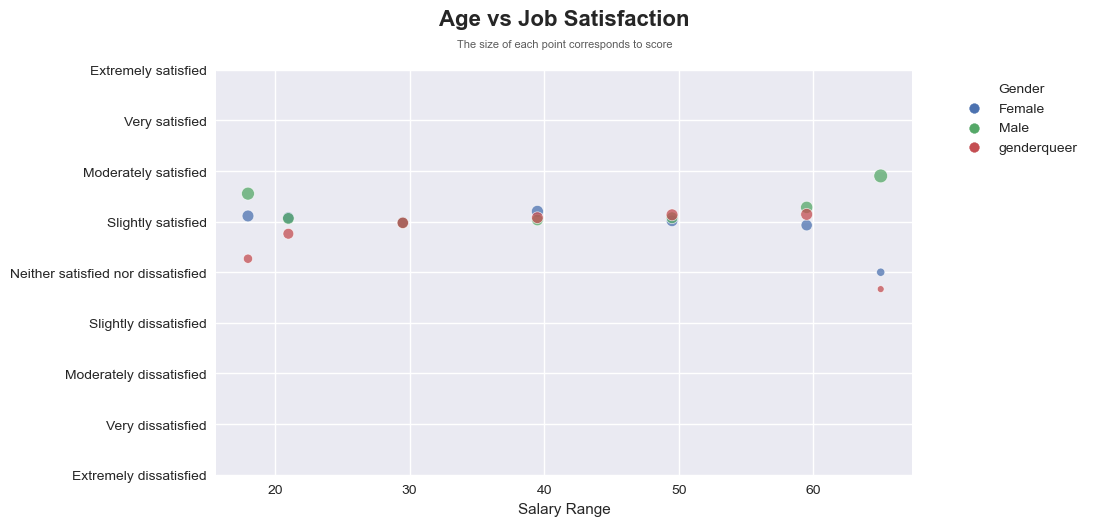

In [63]:
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']


# plot
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(
    x='Age_Range',
    y='Score',
    hue='Gender',
    size='Score',
    alpha=0.75,
    legend='brief',
    data=df_temp,
    ax=ax
)

# make adjustments
ax.set_xlabel('Salary Range')
ax.set_ylabel('')

ax.text(x=0.5, y=1.1, s='Age vs Job Satisfaction', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to score', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

tickvalues = range(0,len(col_order))
plt.yticks(ticks = tickvalues ,labels = col_order)

#fig.tight_layout()
plt.show()
ax.figure.savefig('./figures/Age_vs_JobSatisfaction.png', bbox_inches = "tight")

## Part VI: Company size and job satisfaction

In [44]:
df_temp = df_all[['Company_Size', 'Job_Satisfaction']] #'Salary_Range','Year',
df_temp = df_temp.dropna()
df_temp.shape

(249309, 2)

In [45]:
index = df_temp[df_temp.Company_Size.isin(['I am not part of a company','I am not sure', 'I prefer not to answer',
                                          "I don't know", 'Just me - I am a freelancer, sole proprietor, etc.'])].index


df_temp.drop(index, inplace=True)

In [46]:
df_temp = df_temp.groupby(['Company_Size']).Job_Satisfaction.\
        value_counts(normalize=True).mul(100).rename('Vote_Percentage').reset_index()

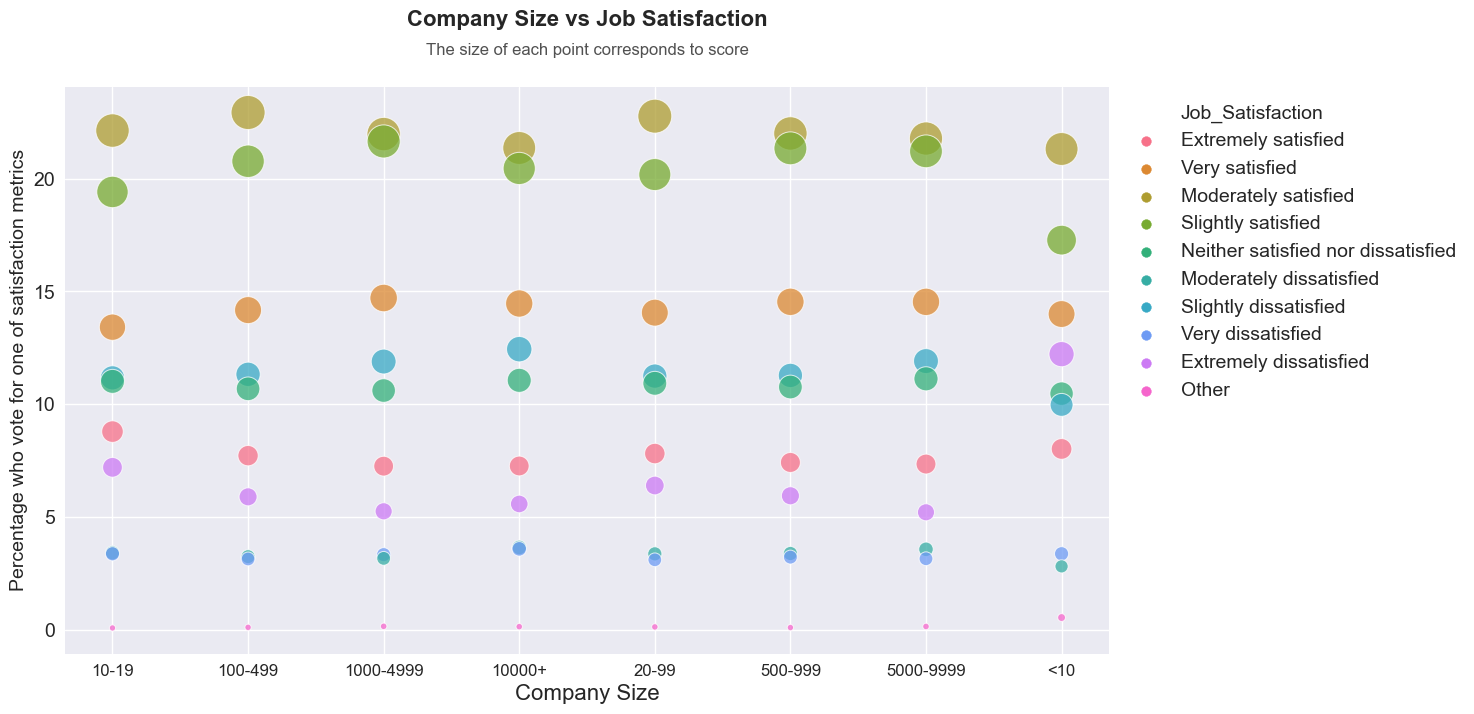

In [54]:
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')

# col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
#             'Slightly dissatisfied','Neither satisfied nor dissatisfied',
#             'Slightly satisfied' ,'Moderately satisfied' ,
#             'Very satisfied' ,'Extremely satisfied']

col_order = ['Extremely satisfied','Very satisfied','Moderately satisfied' ,
             'Slightly satisfied' , 'Neither satisfied nor dissatisfied', 
             'Moderately dissatisfied','Slightly dissatisfied','Very dissatisfied','Extremely dissatisfied','Other']


order = ["<10", "10-19", "20-99", "100-499", "500-999", "1000-4999", "5000-9999","10000+"]
# plot
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(
    x='Company_Size',
    y='Vote_Percentage',
    hue='Job_Satisfaction',
    size='Vote_Percentage',
    alpha=0.75,
    legend='brief',
    data=df_temp,
    ax=ax,
    sizes=(20,600),
    hue_order = col_order
)

# make adjustments
ax.set_xlabel('Company Size',fontsize=16)
ax.set_ylabel('Percentage who vote for one of satisfaction metrics',fontsize=14)

ax.text(x=0.5, y=1.1, s='Company Size vs Job Satisfaction', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to score', fontsize=12, alpha=0.8, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:11],l[:11], bbox_to_anchor=(1, 1), loc=2, fontsize=14) #bbox_to_anchor=(1.05, 1),

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

#fig.tight_layout()
plt.show()
ax.figure.savefig('./figures/CompanySize_vs_JobSatisfaction.png', bbox_inches = "tight")

## Part VII: Education and job satisfaction 


By looking to the results below it shows that participants with university degree have lower job satisfaction in average.

In [170]:
df_temp = df_all[['Formal_Education', 'Gender','Job_Satisfaction']].copy() #'Salary_Range','Year',
df_temp = df_temp.dropna()

dic_sat ={'Extremely dissatisfied':0, 'Very dissatisfied':1,'Neither satisfied nor dissatisfied':4,
          'Moderately dissatisfied':3,'Slightly dissatisfied':2,
          'Slightly satisfied':5 ,'Moderately satisfied':6 ,
          'Very satisfied':7 ,'Extremely satisfied':8 }
for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)


index = df_temp[df_temp['Gender'].isin(['Other','Prefer not to disclose'])].index
df_temp.drop(index, inplace=True)

df_temp.drop(df_temp[df_temp['Job_Satisfaction'] == 'Other'].index,inplace=True)

df_temp = df_temp.groupby(['Formal_Education', 'Gender']).Job_Satisfaction.value_counts().rename('row_count').reset_index()

df_temp['Score'] = df_temp['Job_Satisfaction']*df_temp['row_count']
df_temp = df_temp.drop(columns=['Job_Satisfaction'])

df_temp = df_temp.groupby(['Formal_Education','Gender']).sum().reset_index()

df_temp['Score'] = df_temp['Score']/df_temp['row_count']

#### Plotting Education average score

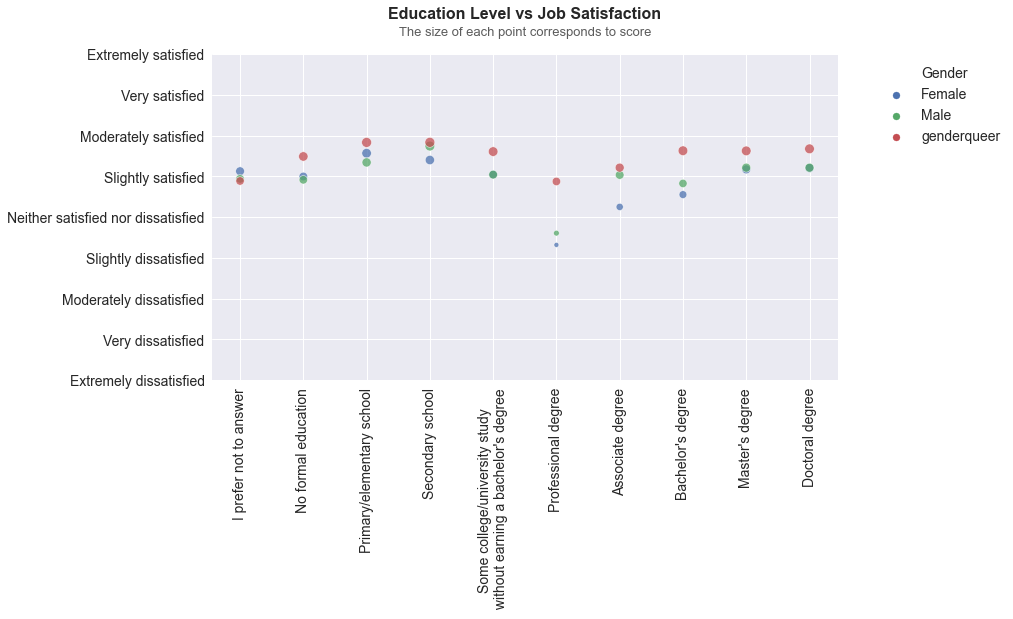

In [178]:
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

x_order = ['I prefer not to answer', 'No formal education','Primary/elementary school', 'Secondary school',
           "Some college/university study\n without earning a bachelor's degree",'Professional degree','Associate degree',"Bachelor's degree",
          "Master's degree",'Doctoral degree']

# plot
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(
    x='Formal_Education',
    y='Score',
    hue='Gender',
    size='Score',
    alpha=0.75,
    legend='brief',
    data=df_temp,
    ax=ax
)

# make adjustments
ax.set_xlabel('')
ax.set_ylabel('')

ax.text(x=0.5, y=1.1, s='Education Level vs Job Satisfaction', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to score', fontsize=13, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)

tickvalues = range(0,len(col_order))
plt.yticks(ticks = tickvalues ,labels = col_order,fontsize=14)

x_tickvalues = range(0,len(x_order))
plt.xticks(ticks = x_tickvalues ,labels = x_order, rotation=90, fontsize=14)

# fig.update_xaxes(categoryorder='array', categoryarray= x_order)
#fig.tight_layout()
plt.show()
ax.figure.savefig('./figures/Education_vs_JobSatisfaction.png', bbox_inches = "tight")